In [44]:
import json

from unidecode import unidecode

import pandas as pd

In [22]:
with open('data/drive_boetto.txt', 'rb') as f:
    names = json.loads(f.read(), encoding = 'utf-8')
names

{'doc': [{'kind': 'drive#file',
   'id': '1FN1UMSpUkaE0GyhkIOOHs7ZPDe3l0-vQrCtZnXIBr2g',
   'name': 'TP Classification Linéaire v2',
   'mimeType': 'application/vnd.google-apps.document'},
  {'kind': 'drive#file',
   'id': '1I7lUCONbWwVeOOn3gHiy7O6Ky_KBQBi86J4nI7jbCeY',
   'name': 'FACEBOOK INVITATION',
   'mimeType': 'application/vnd.google-apps.document'},
  {'kind': 'drive#file',
   'id': '1wONMfwkpmNSVqtO7iF32ItGhrwXlUmjAjt8PGdbRJDY',
   'name': "Mail d'invitation",
   'mimeType': 'application/vnd.google-apps.document'},
  {'kind': 'drive#file',
   'id': '1ORlA6Hk0jYURNR7ykBnzPSOZQtwDl1imxPQMhpzXVP0',
   'name': "mail d'invitation",
   'mimeType': 'application/vnd.google-apps.document'},
  {'kind': 'drive#file',
   'id': '1CMadKqxHKC9EQf2mImKyZdAuF6uJlP0XUG74_akkkME',
   'name': "mail d'invitation",
   'mimeType': 'application/vnd.google-apps.document'},
  {'kind': 'drive#file',
   'id': '1dy2pkyfx9wZH9U2qNWSHhN5oKqqg0iw517GpxYtisBY',
   'name': 'Candidature',
   'mimeType': 'appli

In [142]:
df_doc = pd.DataFrame.from_dict(names['other']) #,orient='index')

In [143]:
df_doc['name_c'] = df_doc['name'].apply(lambda x: unidecode(' '.join(x.lower().split('_'))))

In [144]:
df_doc

,kind,id,name,mimeType,name_c
0,drive#file,1JWLSZl4MMFgraZDcDHoMf3_rjZaqzbSW,CUBLAS_Housing_Skeleton_v2.ipynb,application/vnd.google.colaboratory,cublas housing skeleton v2.ipynb
1,drive#file,1gkCHKPyJY7sA0U2zJcRT4GYqajzjXn9L,MatMult.ipynb,application/vnd.google.colaboratory,matmult.ipynb
2,drive#file,1IMm2BQ6mL2puI_kLbJtv0Zto_R1TYt7-,CUBLAS-Housing-Skeleton_KarlNalpas.ipynb,application/vnd.google.colaboratory,cublas-housing-skeleton karlnalpas.ipynb
3,drive#file,1Or8USZxZcsSdWDy21ybKcf-_WPNe9c57,Untitled,application/vnd.google.colaboratory,untitled
4,drive#file,1GeCQy5lZyN3QoS2ShWm6I53JK7LwkRXq,Colab Notebooks,application/vnd.google-apps.folder,colab notebooks
...,...,...,...,...,...
5951,drive#file,0B0iZLmom3shLfjUwMXZSaDFTWC1FSG01RU04UmVEYXRwS...,Mathématique,application/vnd.google-apps.folder,mathematique
5952,drive#file,0B0iZLmom3shLfnlZczF4U0RINEF1UTBmYUJ0OEtwNDF0T...,Prepa,application/vnd.google-apps.folder,prepa
5953,drive#file,0B0iZLmom3shLflBzY2hxb2lzU3lSWW02S0JSOHJyeDAtc...,Chimie,application/vnd.google-apps.folder,chimie
5954,drive#file,0B0iZLmom3shLfjlFaE12VWxZRHdQM1RuNW5kbTRoQ0FrU...,Physique,application/vnd.google-apps.folder,physique


In [145]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [146]:
X = vect.fit_transform(df_doc.name_c)

In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten = True) 

In [148]:
X_pca = pca.fit_transform(X.todense())

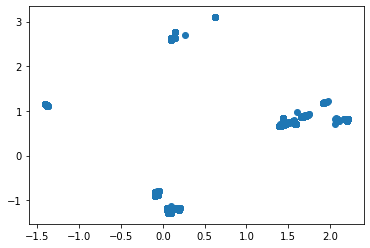

In [149]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1])

In [150]:
from sklearn.cluster import KMeans

In [151]:
kmeans = KMeans(n_clusters = 4)

In [159]:
kmeans.fit_transform(X_pca)

array([[0.23485209, 2.18913368, 2.8704429 , 2.43096596],
       [0.24898173, 2.17520437, 2.86026481, 2.43253876],
       [0.23349297, 2.1904757 , 2.87141277, 2.43080398],
       ...,
       [0.32097955, 2.10425244, 2.80913464, 2.44205772],
       [0.32097955, 2.10425244, 2.80913464, 2.44205772],
       [0.31975537, 2.10545563, 2.81000846, 2.44189488]])

In [160]:
preds = kmeans.predict(X_pca)

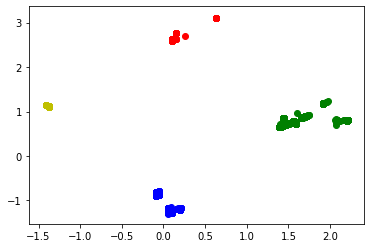

In [161]:
plt.scatter(X_pca[preds==0,0], X_pca[preds==0,1], color = 'g')
plt.scatter(X_pca[preds==1,0], X_pca[preds==1,1], color = 'b')
plt.scatter(X_pca[preds==2,0], X_pca[preds==2,1], color = 'y')
plt.scatter(X_pca[preds==3,0], X_pca[preds==3,1], color = 'r')

In [162]:
df_doc[preds==0]

,kind,id,name,mimeType,name_c
0,drive#file,1JWLSZl4MMFgraZDcDHoMf3_rjZaqzbSW,CUBLAS_Housing_Skeleton_v2.ipynb,application/vnd.google.colaboratory,cublas housing skeleton v2.ipynb
1,drive#file,1gkCHKPyJY7sA0U2zJcRT4GYqajzjXn9L,MatMult.ipynb,application/vnd.google.colaboratory,matmult.ipynb
2,drive#file,1IMm2BQ6mL2puI_kLbJtv0Zto_R1TYt7-,CUBLAS-Housing-Skeleton_KarlNalpas.ipynb,application/vnd.google.colaboratory,cublas-housing-skeleton karlnalpas.ipynb
3,drive#file,1Or8USZxZcsSdWDy21ybKcf-_WPNe9c57,Untitled,application/vnd.google.colaboratory,untitled
4,drive#file,1GeCQy5lZyN3QoS2ShWm6I53JK7LwkRXq,Colab Notebooks,application/vnd.google-apps.folder,colab notebooks
...,...,...,...,...,...
5951,drive#file,0B0iZLmom3shLfjUwMXZSaDFTWC1FSG01RU04UmVEYXRwS...,Mathématique,application/vnd.google-apps.folder,mathematique
5952,drive#file,0B0iZLmom3shLfnlZczF4U0RINEF1UTBmYUJ0OEtwNDF0T...,Prepa,application/vnd.google-apps.folder,prepa
5953,drive#file,0B0iZLmom3shLflBzY2hxb2lzU3lSWW02S0JSOHJyeDAtc...,Chimie,application/vnd.google-apps.folder,chimie
5954,drive#file,0B0iZLmom3shLfjlFaE12VWxZRHdQM1RuNW5kbTRoQ0FrU...,Physique,application/vnd.google-apps.folder,physique


In [163]:
df_doc[preds==1]

,kind,id,name,mimeType,name_c
55,drive#file,16-ysyvrzmUMG47tW861K-Na_Gp6yKb0B,20200114_203449.jpg,image/jpeg,20200114 203449.jpg
56,drive#file,16-dwAM0aEhbTrs1kvmCe8OcEzv7M9CUS,20200114_203035.jpg,image/jpeg,20200114 203035.jpg
57,drive#file,15uuJxdEeBEZiegUZePLgLthrcG5-m0u9,20200114_203241.jpg,image/jpeg,20200114 203241.jpg
58,drive#file,15t8wcH1sPBI8uULhvqLhN-QHMht95t-U,20200114_203249.jpg,image/jpeg,20200114 203249.jpg
59,drive#file,15njzn5niYwO-BV-ld3iuaqNECLhEj4ef,20200114_203434.jpg,image/jpeg,20200114 203434.jpg
...,...,...,...,...,...
5909,drive#file,1l4yUtHKc_vw6PXGWvJlLsTQhbPv6pM58,Renaud1.jpg,image/jpeg,renaud1.jpg
5910,drive#file,1XoFB7M0db8sYRIimiZXv5t1M-kYXaqRc,Simon1.jpg,image/jpeg,simon1.jpg
5911,drive#file,1xQwp7IvIr92MuacxRxBmr_Nn2ij7pXho,Thales1.jpg,image/jpeg,thales1.jpg
5912,drive#file,1H-E35yfpeOnY2UmZssFGr1pS-XXGYF31,Valentin1.jpg,image/jpeg,valentin1.jpg


In [164]:
df_doc[preds==2]

,kind,id,name,mimeType,name_c
78,drive#file,16JeFj9R6Mvg2TwmW1cQppEsz7rFEjB3c,IMG_7565.JPG,image/jpeg,img 7565.jpg
79,drive#file,1GAawVcdidS-x37muLYZJqdSyp_Cw-ayp,IMG_7566.JPG,image/jpeg,img 7566.jpg
80,drive#file,1XN6e4TIvxCdSHJ9VWHlXSuFecr9ndFtF,IMG_7568.JPG,image/jpeg,img 7568.jpg
81,drive#file,1FSjt5p8N6ub-p4b0JQBF9QF-83QcYV9d,IMG_7570.JPG,image/jpeg,img 7570.jpg
82,drive#file,1W_6oVQt1pUTfNbmyzeedV14J60venI42,IMG_7564.JPG,image/jpeg,img 7564.jpg
...,...,...,...,...,...
5570,drive#file,1Phl9JMkpY-Kd2QItKWFQ9ir1RbXhp_d-,IMG_20171206_090803.jpg,image/jpeg,img 20171206 090803.jpg
5578,drive#file,1E7_rv0aZURXZ0pYyvlyW902JFQzsP7NM,IMG_8380.JPG,image/jpeg,img 8380.jpg
5579,drive#file,1ueYzQfbI4O8ZLUHaOyyOh9fGGqekTsF9,IMG_8326.JPG,image/jpeg,img 8326.jpg
5586,drive#file,1RKVju2YDnpgCicsQ1UpS95-uQzWVEvTt,IMG_8318.JPG,image/jpeg,img 8318.jpg


In [165]:
df_doc[preds==3]

,kind,id,name,mimeType,name_c
3475,drive#file,1etQsCgGm4Db_S1-tAZiVWRaQGhhJlFMC,IMG_9864.png,image/png,img 9864.png
3495,drive#file,16SnJwu47JaVMWpPr8SPvI6O0x4lRA-hb,IMG_9293.png,image/png,img 9293.png
3496,drive#file,1kpow2dJk0CK9lZIELETUWEHzEwHgnh1_,IMG_9294.png,image/png,img 9294.png
3544,drive#file,1ukWMzZdXj1gNrJ7M5R_27DRXo77CLl6y,IMG_8388.png,image/png,img 8388.png
3546,drive#file,1tJSr3P-h62M1aqFuyKWH-9MCovAQG9F4,IMG_8180.png,image/png,img 8180.png
...,...,...,...,...,...
5584,drive#file,1sJBmZ-g71y86tYtQnWmI_z8txsckz6sN,IMG_8374.HEIC,image/heif,img 8374.heic
5585,drive#file,1kncycd_fgLzh9mW6i5ldfqzo5l1E33Fn,IMG_8376.HEIC,image/heif,img 8376.heic
5590,drive#file,1_-nX2vxhJyd0fOIlBCNq7OMX1VmI2-GC,IMG_8340.MOV,video/quicktime,img 8340.mov
5591,drive#file,1iMVy_am7cu62FEkxyfPDa3GFogrJwKvl,IMG_8320.MOV,video/quicktime,img 8320.mov
